# Alex Spence
DSC 640 Week 9 & 10
TSA

Merged airport_complaints columns: ['pdf_report_date', 'airport', 'year_month', 'count', 'iata', 'airport_name', 'country_code']


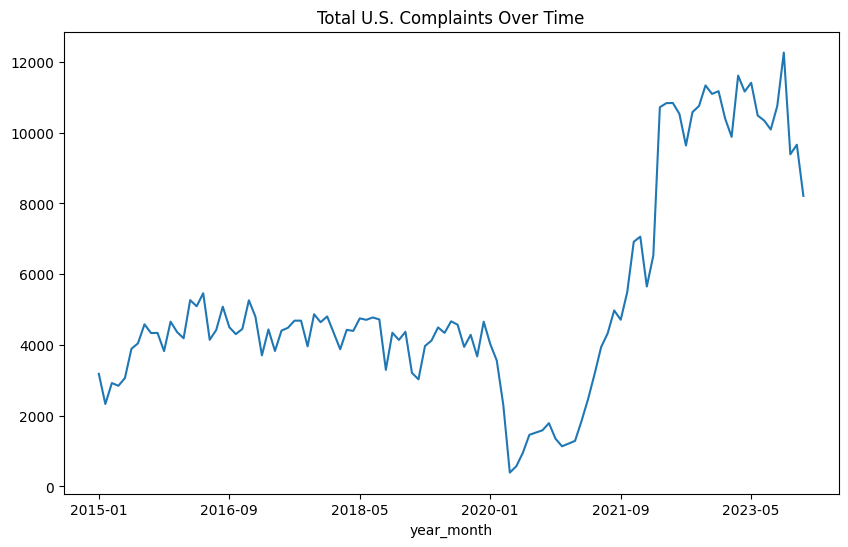

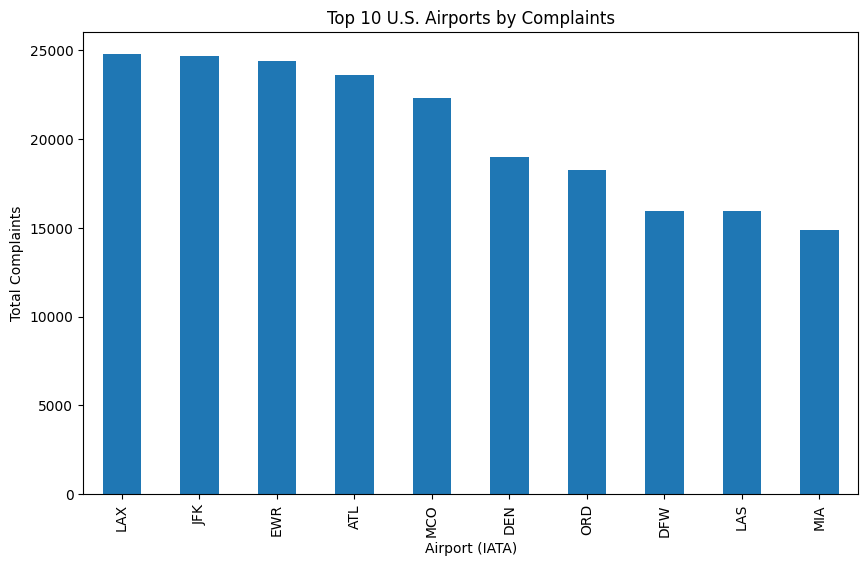

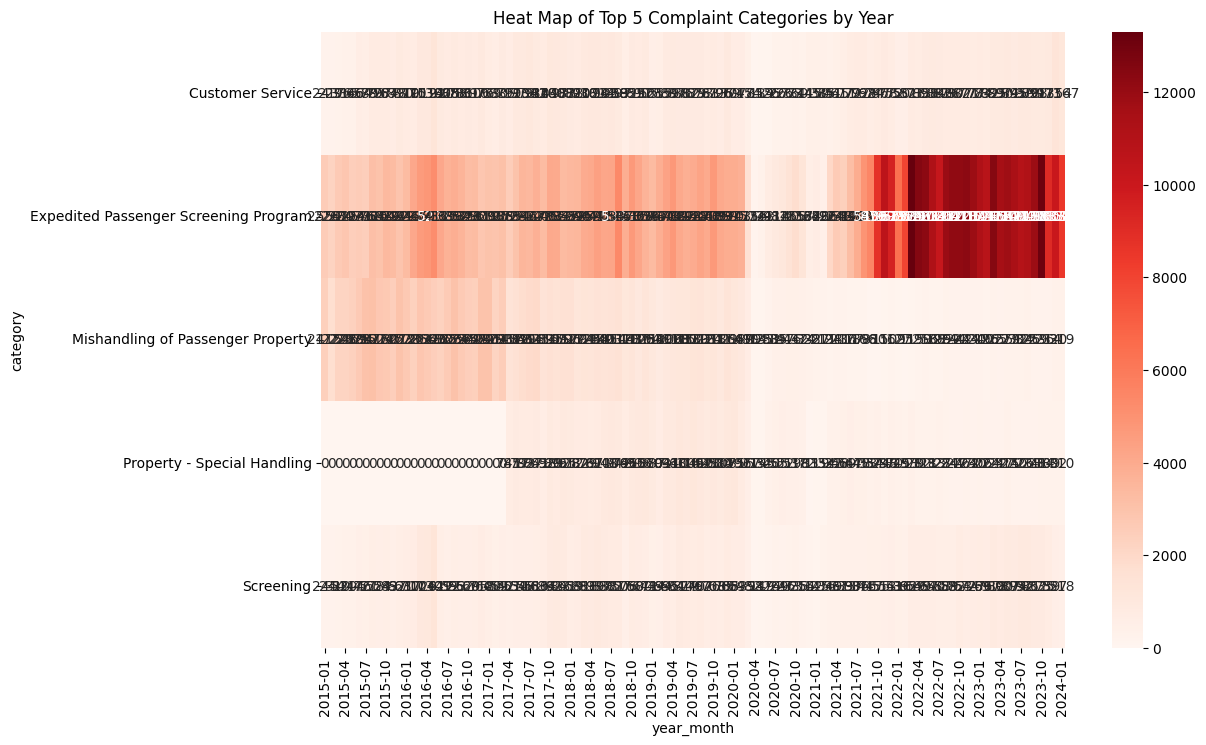

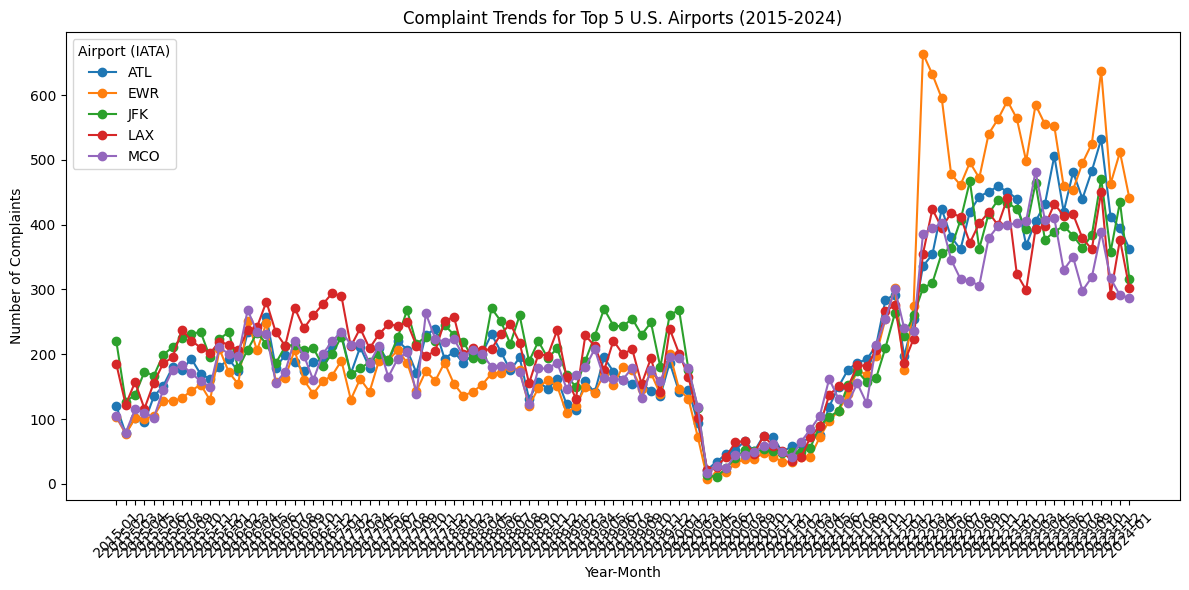

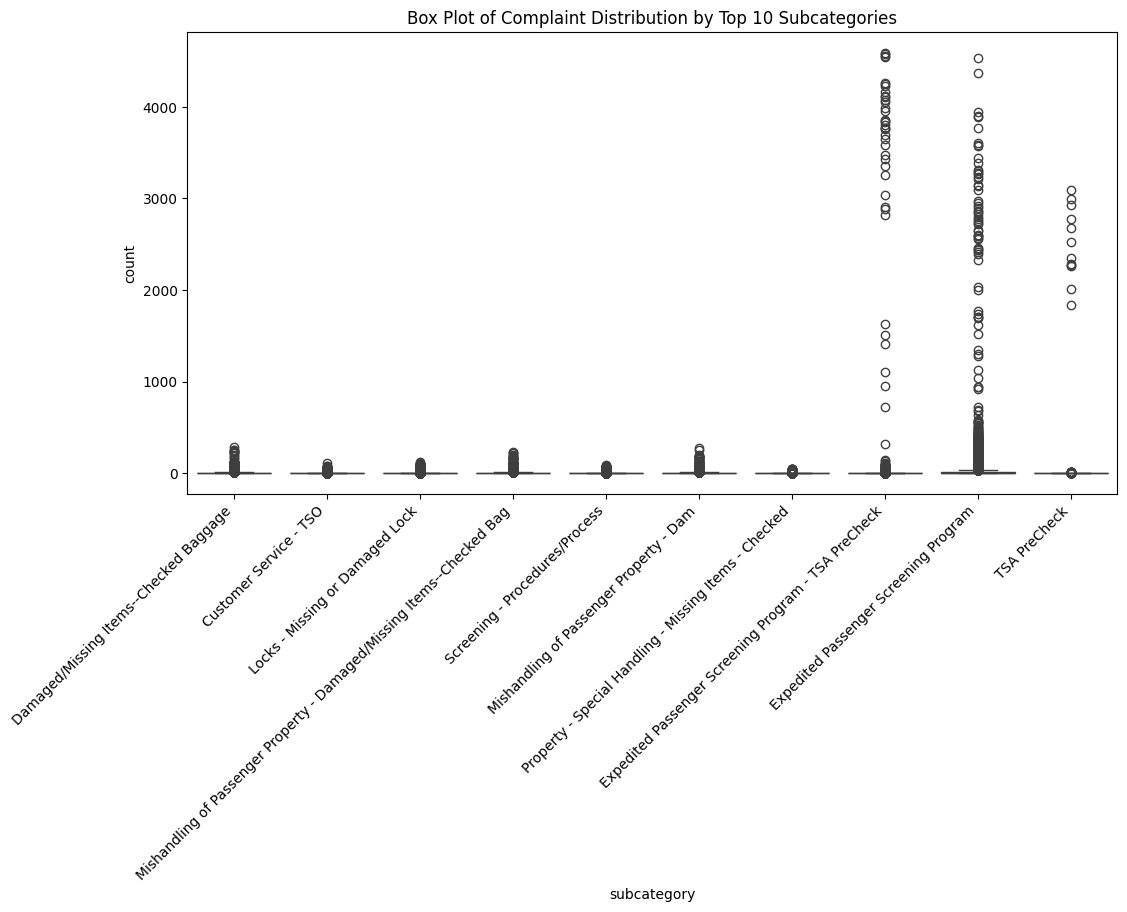

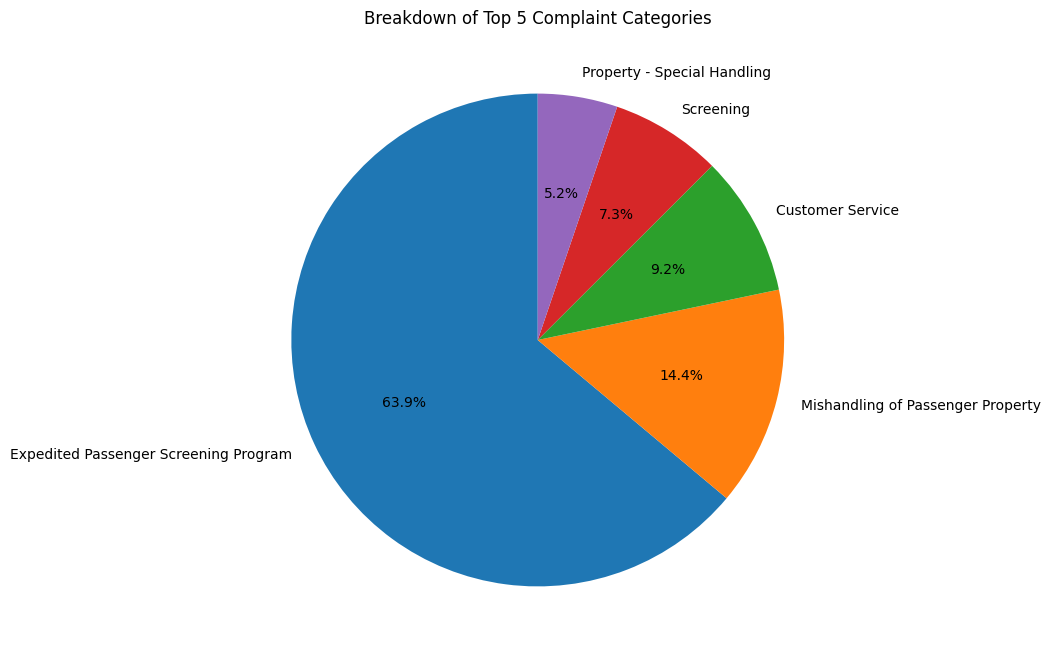

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import requests

# Load datasets
airport_complaints = pd.read_csv('complaints-by-airport.csv')
category_complaints = pd.read_csv('complaints-by-category.csv')
subcategory_complaints = pd.read_csv('complaints-by-subcategory.csv')
airports = pd.read_csv('iata-icao.csv')

# Join airport names and filter to U.S.
airport_complaints = airport_complaints.merge(airports[['iata', 'airport', 'country_code']], 
                                             left_on='airport', right_on='iata', 
                                             how='left', suffixes=('', '_full_name'))
airport_complaints = airport_complaints.rename(columns={'airport_full_name': 'airport_name'})
us_airport_complaints = airport_complaints[airport_complaints['country_code'] == 'US']

# Debug: Check columns
print("Merged airport_complaints columns:", us_airport_complaints.columns.tolist())

# Visual 1: Line Chart - Total U.S. Complaints Over Time
time_complaints = us_airport_complaints.groupby('year_month')['count'].sum()
plt.figure(figsize=(10,6))
time_complaints.plot(kind='line')
plt.title('Total U.S. Complaints Over Time')
plt.savefig('visual1.png')

# Visual 2: Bar Chart - Top U.S. Airports
top_airports = us_airport_complaints.groupby('airport')['count'].sum().nlargest(10)
plt.figure(figsize=(10,6))
top_airports.plot(kind='bar')
plt.title('Top 10 U.S. Airports by Complaints')
plt.xlabel('Airport (IATA)')
plt.ylabel('Total Complaints')
plt.savefig('visual2.png')

# Visual 3: Heat Map - Complaints by Category and Year (Top 5 Categories)
top_categories = category_complaints.groupby('category')['count'].sum().nlargest(5).index
category_filtered = category_complaints[category_complaints['category'].isin(top_categories)]
category_pivot = category_filtered.pivot_table(index='category', columns='year_month', values='count', aggfunc='sum')
category_pivot = category_pivot.fillna(0).astype(int)
plt.figure(figsize=(12,8))
sns.heatmap(category_pivot, cmap='Reds', annot=True, fmt='d')
plt.title('Heat Map of Top 5 Complaint Categories by Year')
plt.savefig('visual3.png')

# Visual 4: Line Chart - Complaint Trends for Top 5 U.S. Airports
top_5_airports = us_airport_complaints.groupby('airport')['count'].sum().nlargest(5).index
top_airport_data = us_airport_complaints[us_airport_complaints['airport'].isin(top_5_airports)]
airport_trends = top_airport_data.groupby(['year_month', 'airport'])['count'].sum().unstack()
plt.figure(figsize=(12,6))
for column in airport_trends.columns:
    plt.plot(airport_trends.index, airport_trends[column], marker='o', label=column)
plt.title('Complaint Trends for Top 5 U.S. Airports (2015-2024)')
plt.xlabel('Year-Month')
plt.ylabel('Number of Complaints')
plt.legend(title='Airport (IATA)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('visual4.png')

# Visual 5: Box Plot - Complaint Distribution by Top 10 Subcategories
top_subcategories = subcategory_complaints.groupby('subcategory')['count'].sum().nlargest(10).index
subcategory_filtered = subcategory_complaints[subcategory_complaints['subcategory'].isin(top_subcategories)]
plt.figure(figsize=(12,6))
sns.boxplot(data=subcategory_filtered, x='subcategory', y='count')
plt.title('Box Plot of Complaint Distribution by Top 10 Subcategories')
plt.xticks(rotation=45, ha='right')
plt.savefig('visual5.png')

# Visual 6: Pie Chart - Top 5 Category Breakdown
category_breakdown = category_complaints.groupby('category')['count'].sum().nlargest(5)
plt.figure(figsize=(8,8))
category_breakdown.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Breakdown of Top 5 Complaint Categories')
plt.ylabel('')  # Hide y-label for pie
plt.savefig('visual6.png')